In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import time
import warnings
warnings.filterwarnings('ignore')

# Read data and clean data

In [74]:
train_data=pd.read_csv("Groceries data train.csv")
test_data=pd.read_csv("Groceries data test.csv")

In [75]:
train_data.describe()

,Member_number,year,month,day,day_of_week
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,3002.872667,2014.529037,6.485074,15.744444,3.020852
std,1153.928123,0.499165,3.431239,8.784553,1.987826
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2003.000000,2014.000000,4.000000,8.000000,1.000000
50%,3002.000000,2015.000000,6.000000,16.000000,3.000000
75%,4010.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [76]:
train_data.head(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1


In [77]:
#check null values in test dataset
train_data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [78]:
test_data.describe()

,Member_number,year,month,day,day_of_week
count,11765.000000,11765.000000,11765.000000,11765.000000,11765.000000
mean,3005.407140,2014.527327,6.460348,15.773396,2.999915
std,1152.930079,0.499274,3.432384,8.840255,1.987315
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,3.000000,8.000000,1.000000
50%,3013.000000,2015.000000,7.000000,16.000000,3.000000
75%,4003.000000,2015.000000,9.000000,24.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [79]:
test_data.head(5)

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3481,8/03/2015,candy,2015,3,8,6
1,1254,19/04/2015,white wine,2015,4,19,6
2,2835,28/01/2014,domestic eggs,2014,1,28,1
3,2854,2/08/2015,coffee,2015,8,2,6
4,4637,12/08/2014,bottled water,2014,8,12,1


In [80]:
#check null values in test dataset
test_data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [81]:
#check duplicates in train dataset
train_data.duplicated().sum()

380

In [82]:
#check duplicates in test dataset
test_data.duplicated().sum()

57

In [83]:
#drop duplicates
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

In [84]:
#Lower all text
train_data=train_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
test_data=test_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Data Visualization 

Text(0.5, 1.0, 'Top 10 Popular Sold Items')

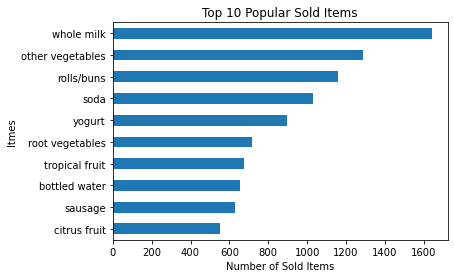

In [85]:
# Top 10 Popular Sold Items
df= train_data.groupby(["itemDescription"])["itemDescription"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Sold Items')
plt.title('Top 10 Popular Sold Items')

Text(0.5, 1.0, 'Top 10 Member number')

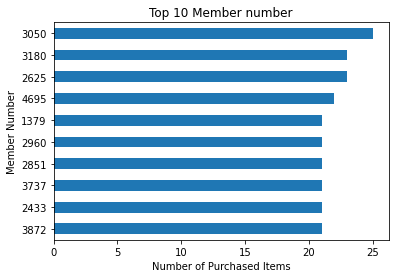

In [16]:
# Top 10 Member number
df= train_data.groupby(["Member_number"])["Member_number"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Member Number')
plt.xlabel('Number of Purchased Items')
plt.title('Top 10 Member number')

# Frequent Pattern

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [134]:
# load data
train = pd.read_csv('Groceries data train.csv')
test = pd.read_csv('Groceries data test.csv')
print(train.shape)
print(test.shape)
# Drop duplicates
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
train['itemDescription'] = train['itemDescription'].str.lower()
test['itemDescription'] = test['itemDescription'].str.lower()
# Drop unnecessary columns
train = train[['Member_number', 'Date', 'itemDescription']]
test = test[['Member_number', 'Date', 'itemDescription']]

(27000, 7)
(11765, 7)


In [135]:
# list items by member IDs
train_user_id = train['Member_number'].unique()
test_user_id = test['Member_number'].unique()
train_items = [list(train.loc[train['Member_number'] == id, 'itemDescription']) for id in train_user_id]
test_items = [list(test.loc[test['Member_number'] == id, 'itemDescription']) for id in test_user_id]
train_items

[['frankfurter',
  'root vegetables',
  'soups',
  'onions',
  'bottled water',
  'sliced cheese',
  'fruit/vegetable juice'],
 ['pork', 'whole milk', 'beverages', 'oil'],
 ['root vegetables',
  'rolls/buns',
  'frozen vegetables',
  'fruit/vegetable juice',
  'margarine',
  'bottled beer',
  'rolls/buns',
  'domestic eggs',
  'chocolate',
  'mustard',
  'whipped/sour cream',
  'whole milk'],
 ['onions', 'red/blush wine', 'yogurt', 'whole milk', 'butter milk'],
 ['waffles',
  'newspapers',
  'yogurt',
  'sausage',
  'ketchup',
  'chocolate',
  'frozen meals',
  'yogurt',
  'whole milk',
  'shopping bags',
  'long life bakery product',
  'newspapers',
  'domestic eggs'],
 ['cereals', 'cream cheese ', 'rolls/buns', 'citrus fruit', 'rolls/buns'],
 ['yogurt',
  'long life bakery product',
  'grapes',
  'bottled water',
  'other vegetables',
  'rolls/buns'],
 ['sausage', 'bottled water', 'rolls/buns', 'hamburger meat'],
 ['rolls/buns', 'canned beer', 'chicken', 'whole milk', 'soda', 'grapes

In [136]:
# create a item matrix
def item_matrix(items):
    TE = TransactionEncoder()
    TE.fit(items)
    item_transformed = TE.transform(items)
    item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
    return item_matrix

# get the support value by Apriori algorithm
def get_freq_items(item_matrix, min_support):
    freq_items = apriori(item_matrix, min_support=min_support, use_colnames=True, max_len=2)
    return freq_items

# create a datafram with product support, confidence , and lift values
def rules(freq_items):
    rules = association_rules(freq_items, metric = "confidence", min_threshold = 0)
    rules.sort_values('confidence', ascending=False)
    return rules

# get the most important 5 items rules
def top_5_rules(rules):
    top_5_rules = rules.sort_values(by=['confidence'], ascending=False).head(5)
    return top_5_rules

# print frequent patterns
def print_recommendations(rules):
    for index, row in rules.iterrows():
        print('Rule #{0}'.format(index))
        premise = row['antecedents']
        conclusion = row['consequents']
        support = row['support']
        confidence = row['confidence']
        lift = row['lift']

        print('Rule: if a person buys {0} they will also buy {1}'.format(premise,conclusion))
        print('- Support: {0:.3f}'.format(support))
        print('- Confidence: {0:.3f}'.format(confidence))
        print('- Lift: {0:.3f}'.format(lift))

        print('')

In [137]:
train_item_matrix = item_matrix(train_items)
test_item_matrix = item_matrix(test_items)

train_freq_items = get_freq_items(train_item_matrix, 0.05)
test_freq_items = get_freq_items(test_item_matrix, 0.01)

train_rules = rules(train_freq_items)
test_rules = rules(test_freq_items)

train_top_5_rules = top_5_rules(train_rules)
test_top_5_rules = top_5_rules(test_rules)

In [138]:
start_time_a = time.time()
train_item_matrix = item_matrix(train_items)
train_freq_items = get_freq_items(train_item_matrix, 0.05)

train_rules = rules(train_freq_items)
train_top_5_rules = top_5_rules(train_rules)
end_time_a = time.time()
cf_time = end_time_a - start_time_a
print("Time for generating association rule :"+str(cf_time))

Time for generating association rule :0.029918432235717773


In [139]:
# print a datafram with product support, confidence , and lift values
train_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(bottled beer),0.347366,0.118285,0.051136,0.147212,1.244551,0.010048,1.033920,0.301084
1,(bottled beer),(whole milk),0.118285,0.347366,0.051136,0.432314,1.244551,0.010048,1.149640,0.222858
2,(other vegetables),(bottled water),0.284866,0.159866,0.054752,0.192203,1.202278,0.009212,1.040032,0.235265
3,(bottled water),(other vegetables),0.159866,0.284866,0.054752,0.342488,1.202278,0.009212,1.087637,0.200261
4,(whole milk),(bottled water),0.347366,0.159866,0.068698,0.197770,1.237098,0.013166,1.047248,0.293666
5,(bottled water),(whole milk),0.159866,0.347366,0.068698,0.429725,1.237098,0.013166,1.144421,0.228126
6,(whole milk),(canned beer),0.347366,0.115961,0.050103,0.144238,1.243851,0.009823,1.033043,0.300391
7,(canned beer),(whole milk),0.115961,0.347366,0.050103,0.432071,1.243851,0.009823,1.149148,0.221761
8,(citrus fruit),(whole milk),0.133781,0.347366,0.050878,0.380309,1.094837,0.004407,1.053161,0.100000
9,(whole milk),(citrus fruit),0.347366,0.133781,0.050878,0.146468,1.094837,0.004407,1.014865,0.132727


In [140]:
def predict_items(purchased_items):
    # create a list to store the predicted items
    predicted_items = []
    
    # iterate over the top rules
    for index, row in train_rules.iterrows():
        # get the items in the antecedent and consequent of the rule
        antecedent = row["antecedents"]
        consequent = row["consequents"]
        
        # check if all the items in the antecedent are in the purchased items
        if antecedent.issubset(purchased_items):
            # add the items in the consequent to the predicted items
            predicted_items.append(consequent)
    
    # return the list of predicted items
    return predicted_items

In [142]:
start_time_a = time.time()
new_test_data = train.reset_index(drop=True)
result=pd.DataFrame(columns=["itemDescription","predicted_item"])
for i in range(len(new_test_data)):
    tmp=new_test_data.loc[i]
    item=tmp["itemDescription"]
    res=predict_items(item)
    result=result.append(pd.DataFrame(res),ignore_index=True)
end_time_a = time.time()
cf_time = end_time_a - start_time_a
print("Time for generating recommendations using frequent partten :"+str(cf_time))

Time for generating recommendations using frequent partten :55.75991988182068


In [143]:
# make a prediction for a sample set of purchased items
purchased_items = {"bottled beer"}
predicted_items = predict_items(purchased_items)

# print the predicted items to the console
print(predicted_items)

[frozenset({'whole milk'})]


In [144]:
# compare the frequent items in trainset and testset
train_set = set(train_freq_items['itemsets'].apply(lambda x: frozenset(x)))
test_set = set(test_freq_items['itemsets'].apply(lambda x: frozenset(x)))
print('frequent items in trainset but not in testset:')
print(train_set - test_set)

frequent items in trainset but not in testset:
set()


# Data preprocessing- create "rating"

In [17]:
new_df=train_data.copy()

In [18]:
###Create column "rating"
###Here, we use the number of times each user purchased each product as the rating, for example, 
### if user A purchased "yoghurt" 3 times, the rating is 3.
train_rating=pd.DataFrame(columns=["Member_number","itemDescription","Rating"])
for i in range(len(new_df)):
    Member_number=new_df.iloc[i]["Member_number"]
    itemDescription=new_df.iloc[i]["itemDescription"]
    tmp=new_df.loc[(new_df["Member_number"]==Member_number)&(new_df["itemDescription"]==itemDescription)]
    count=len(tmp)
    new_line ={"Member_number":Member_number,"itemDescription":itemDescription,
                             "Rating":count}
    train_rating=train_rating.append(new_line,ignore_index=True)

In [19]:
new_df=test_data.copy()
test_rating=pd.DataFrame(columns=["Member_number","itemDescription","Rating"])
for i in range(len(new_df)):
    Member_number=new_df.iloc[i]["Member_number"]
    itemDescription=new_df.iloc[i]["itemDescription"]
    tmp=new_df.loc[(new_df["Member_number"]==Member_number)&(new_df["itemDescription"]==itemDescription)]
    count=len(tmp)
    new_line ={"Member_number":Member_number,"itemDescription":itemDescription,
                             "Rating":count}
    test_rating=test_rating.append(new_line,ignore_index=True)

In [20]:
#drop duplicates
train_rating = train_rating.drop_duplicates()
test_rating = test_rating.drop_duplicates()

In [21]:
test_rating.describe()

,Member_number,itemDescription,Rating
count,11388,11388,11388
unique,3566,162,3
top,2600,whole milk,1
freq,13,712,11078


In [22]:
train_rating.describe()

,Member_number,itemDescription,Rating
count,25010,25010,25010
unique,3872,167,4
top,3050,whole milk,1
freq,21,1345,23517


# Data -- Recommandations

In [23]:
#We choose item based collbrative filtering in our project, since the number of items is much less than the number of users
#item based rating metrix
rating = pd.DataFrame(pd.pivot_table(train_rating, index='itemDescription', columns='Member_number', values='Rating'))
rating.fillna(0, inplace=True)
rating

Member_number,1000,1001,1002,1003,1004,1005,1006,1008,1009,1010,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
itemDescription,,,,,,,,,,,,,,,,,,,,,
abrasive cleaner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
artif. sweetener,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
baby cosmetics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bags,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
baking powder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
white wine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
whole milk,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# calculate similarity
sim_rating = pd.DataFrame(cosine_similarity(rating, rating), index=rating.index,
                           columns=rating.index)
sim_rating 

itemDescription,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,uht-milk,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
itemDescription,,,,,,,,,,,,,,,,,,,,,
abrasive cleaner,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.057378,0.018294,0.000000,0.049147,...,0.019507,0.000000,0.020672,0.000000,0.000000,0.017869,0.000000,0.023927,0.017392,0.000000
artif. sweetener,0.000000,1.000000,0.125988,0.0,0.000000,0.000000,0.021687,0.013829,0.016449,0.027864,...,0.014746,0.000000,0.031254,0.028792,0.000000,0.027015,0.000000,0.054261,0.019721,0.000000
baby cosmetics,0.000000,0.125988,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017392,0.000000
bags,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.028689,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
baking powder,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.064299,0.054669,0.056897,0.045897,...,0.029147,0.000000,0.030888,0.061652,0.000000,0.013349,0.029051,0.084908,0.074712,0.033278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.017869,0.027015,0.000000,0.0,0.013349,0.037326,0.101500,0.062762,0.065321,0.076403,...,0.050193,0.029735,0.044326,0.122503,0.030949,1.000000,0.083380,0.161609,0.124929,0.057307
white wine,0.000000,0.000000,0.000000,0.0,0.029051,0.054153,0.058010,0.073983,0.027077,0.057334,...,0.042478,0.043140,0.045016,0.067142,0.044901,0.083380,1.000000,0.113510,0.110913,0.013857
whole milk,0.023927,0.054261,0.000000,0.0,0.084908,0.043734,0.198722,0.148386,0.126516,0.245183,...,0.158224,0.046453,0.152839,0.241499,0.051803,0.161609,0.113510,1.000000,0.310852,0.111907


In [ ]:
rating = pd.DataFrame(pd.pivot_table(train_rating, index='itemDescription', columns='Member_number', values='Rating'))
rating.fillna(0, inplace=True)
sim_rating = pd.DataFrame(cosine_similarity(rating, rating), index=rating.index,
                           columns=rating.index)
sim_rating 

In [67]:
#Do the same thing for test dataset
start_time_a = time.time()
test_rating_piv = pd.DataFrame(pd.pivot_table(test_rating, index='itemDescription', columns='Member_number', values='Rating'))
test_rating_piv.fillna(0, inplace=True)
sim_rating_test = pd.DataFrame(cosine_similarity(test_rating_piv,test_rating_piv), index=test_rating_piv.index,
                           columns=test_rating_piv.index)
end_time_a = time.time()
cf_time = end_time_a - start_time_a
print("Time for generating U-I and similarity mrtrics:"+str(cf_time))

Time for generating U-I and similarity mrtrics:0.9654185771942139


In [26]:
#Get the predicted rating (code adapted from workshop and https://medium.com/geekculture/overview-of-item-item-collaborative-filtering-recommendation-system)
def get_prediction(userid, itemname, sim_rating, rating):
    user_rating = rating.loc[:,userid]
    item_similarity = sim_rating.sort_values(by=itemname, ascending=False).loc[:, itemname].tolist()
    weighted_sum = np.dot(item_similarity, user_rating)
    weighted_sum /= np.sum(item_similarity)
    return weighted_sum



In [27]:
#Evaulate performance on train data set
pred = []
test_real = train_rating['Rating'].to_numpy()
for _,row in train_rating.iterrows():
    res = get_prediction(row[0], row[1], sim_rating, rating)
    pred.append(res)
rmse = np.sqrt(np.mean((test_real - pred)**2))
print(f'Train data RMSE = {rmse}')

Train data RMSE = 1.0537778191184117


In [28]:
#Evaulate performance on test data set
pred = []
test_real = test_rating['Rating'].to_numpy()
for _,row in test_rating.iterrows():
    res = get_prediction(row[0], row[1], sim_rating_test, test_rating_piv)
    pred.append(res)
rmse = np.sqrt(np.mean((test_real - pred)**2))
print(f'Test data RMSE = {rmse}')

Test data RMSE = 1.0218675816692118


In [49]:
# get the recommandations
def get_recommandation(item,n):
    if item not in sim_rating.columns:
        print("The item is not in the list!")
        return None
    else:
        recommendations=pd.DataFrame(columns=["itemDescription","predicted_item","similarity"])
        items = sim_rating.sort_values(by=item, ascending=False).index[1:]
        score = sim_rating.sort_values(by=item, ascending=False).loc[:, item].tolist()[1:]
        recommendations["predicted_item"]=items[:n]
        recommendations["similarity"]=score[:n]
        recommendations["itemDescription"]=item
        return recommendations

In [50]:
get_recommandation("pip fruit",5)

,itemDescription,predicted_item,similarity
0,pip fruit,whole milk,0.231595


In [53]:
#test_data recommendation, Top 5 for each item
new_test_data = test_data.reset_index(drop=True)
result=pd.DataFrame(columns=["itemDescription","predicted_item","similarity"])
for i in range(len(new_test_data)):
    tmp=new_test_data.loc[i]
    item=tmp["itemDescription"]
    res=get_recommandation(item,1)
    result=result.append(pd.DataFrame(res),ignore_index=True)

In [61]:
result

,itemDescription,predicted_item,similarity
0,candy,whole milk,0.140622
1,white wine,whole milk,0.113510
2,domestic eggs,whole milk,0.209313
3,coffee,soda,0.177055
4,bottled water,whole milk,0.277818
...,...,...,...
11703,other vegetables,whole milk,0.319630
11704,margarine,whole milk,0.183132
11705,brown bread,rolls/buns,0.202564
11706,bottled water,whole milk,0.277818


Text(0.5, 1.0, 'Top 10 Popular Predicted Items')

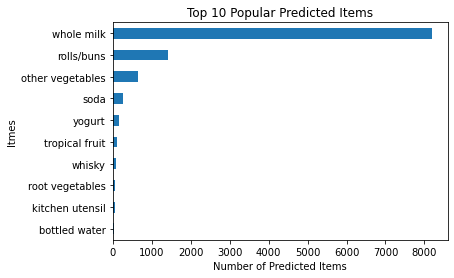

In [57]:
# Top 10 Popular Sold Items
df= result.groupby(["predicted_item"])["predicted_item"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Predicted Items')
plt.title('Top 10 Popular Predicted Items')

Time for generating recommendations using collaborative filtering :51.38924217224121


Text(0.5, 1.0, 'Top 10 Popular Predicted Items')

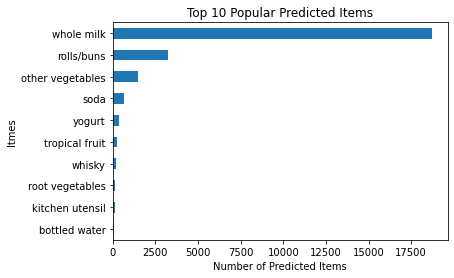

In [66]:
start_time_a = time.time()
new_test_data = train_data.reset_index(drop=True)
result=pd.DataFrame(columns=["itemDescription","predicted_item","similarity"])
for i in range(len(new_test_data)):
    tmp=new_test_data.loc[i]
    item=tmp["itemDescription"]
    res=get_recommandation(item,1)
    result=result.append(pd.DataFrame(res),ignore_index=True)
end_time_a = time.time()
cf_time = end_time_a - start_time_a
print("Time for generating recommendations using collaborative filtering :"+str(cf_time))
# Top 10 Popular Sold Items
df= result.groupby(["predicted_item"])["predicted_item"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Predicted Items')
plt.title('Top 10 Popular Predicted Items')

In [63]:
result

,itemDescription,predicted_item,similarity
0,frankfurter,whole milk,0.200915
1,pork,whole milk,0.199505
2,root vegetables,whole milk,0.238815
3,onions,whole milk,0.143349
4,waffles,whole milk,0.152839
...,...,...,...
26615,newspapers,whole milk,0.211225
26616,domestic eggs,whole milk,0.209313
26617,liver loaf,bags,0.094916
26618,sausage,whole milk,0.269072


# Pattern --- recommandations

In [86]:
#Here we use the association rule generated by groupmate 1. We read the rule from the csv file and generate the recommandations
rules =pd.read_csv("Apriori_train_ association_rules.csv",index_col=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'whole milk'}),frozenset({'bottled beer'}),0.347366,0.118285,0.051136,0.147212,1.244551,0.010048,1.033920,0.301084
1,frozenset({'bottled beer'}),frozenset({'whole milk'}),0.118285,0.347366,0.051136,0.432314,1.244551,0.010048,1.149640,0.222858
2,frozenset({'other vegetables'}),frozenset({'bottled water'}),0.284866,0.159866,0.054752,0.192203,1.202278,0.009212,1.040032,0.235265
3,frozenset({'bottled water'}),frozenset({'other vegetables'}),0.159866,0.284866,0.054752,0.342488,1.202278,0.009212,1.087637,0.200261
4,frozenset({'bottled water'}),frozenset({'whole milk'}),0.159866,0.347366,0.068698,0.429725,1.237098,0.013166,1.144421,0.228126
5,frozenset({'whole milk'}),frozenset({'bottled water'}),0.347366,0.159866,0.068698,0.197770,1.237098,0.013166,1.047248,0.293666
6,frozenset({'whole milk'}),frozenset({'canned beer'}),0.347366,0.115961,0.050103,0.144238,1.243851,0.009823,1.033043,0.300391
7,frozenset({'canned beer'}),frozenset({'whole milk'}),0.115961,0.347366,0.050103,0.432071,1.243851,0.009823,1.149148,0.221761
8,frozenset({'whole milk'}),frozenset({'citrus fruit'}),0.347366,0.133781,0.050878,0.146468,1.094837,0.004407,1.014865,0.132727
9,frozenset({'citrus fruit'}),frozenset({'whole milk'}),0.133781,0.347366,0.050878,0.380309,1.094837,0.004407,1.053161,0.100000


In [87]:
test_rules =pd.read_csv("Apriori_test_ association_rules.csv",index_col=0)
test_rules["antecedents"]=test_rules["antecedents"].replace("frozenset({''})", '')
test_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'beef'}),frozenset({'whole milk'}),0.039540,0.199663,0.010095,0.255319,1.278747,0.002201,1.074738,0.226959
1,frozenset({'bottled beer'}),frozenset({'whole milk'}),0.052159,0.199663,0.011217,0.215054,1.077081,0.000803,1.019607,0.075503
2,frozenset({'bottled water'}),frozenset({'other vegetables'}),0.073191,0.151150,0.012339,0.168582,1.115333,0.001276,1.020967,0.111573
3,frozenset({'bottled water'}),frozenset({'whole milk'}),0.073191,0.199663,0.012058,0.164751,0.825143,-0.002555,0.958201,-0.186096
4,frozenset({'bottled water'}),frozenset({'yogurt'}),0.073191,0.107403,0.010376,0.141762,1.319908,0.002515,1.040035,0.261512
5,frozenset({'canned beer'}),frozenset({'whole milk'}),0.061413,0.199663,0.012619,0.205479,1.029129,0.000357,1.007320,0.030156
6,frozenset({'citrus fruit'}),frozenset({'other vegetables'}),0.068144,0.151150,0.011217,0.164609,1.089046,0.000917,1.016111,0.087745
7,frozenset({'citrus fruit'}),frozenset({'whole milk'}),0.068144,0.199663,0.014021,0.205761,1.030541,0.000416,1.007678,0.031803
8,frozenset({'frankfurter'}),frozenset({'whole milk'}),0.046831,0.199663,0.010376,0.221557,1.109651,0.001025,1.028125,0.103671
9,frozenset({'pastry'}),frozenset({'other vegetables'}),0.062255,0.151150,0.010095,0.162162,1.072858,0.000686,1.013144,0.072418


In [108]:
#get recommandations from association rule
def rule_recommandation(rules,user_itemset,n):
    rules = rules.sort_values(by='confidence', ascending=False)
    filtered_rules = rules[rules['antecedents'] == user_itemset]
    # Select top recommendations from the filtered rules
    if (len(filtered_rules)==0):
        confidence=0
        top_recommendations=""
    else:
        top_recommendations = filtered_rules.head(n)['consequents'].tolist()
        confidence = filtered_rules.head(n)['confidence'].tolist()
    return confidence,top_recommendations


In [109]:
confidence,rec= rule_recommandation(rules,"frozenset({'whole milk'})",5)
result=pd.DataFrame(columns=["Recommandation","Confidence"])
result["Recommandation"]=rec
result["Confidence"]=confidence

In [110]:
#result from association rule pattern
result

,Recommandation,Confidence
0,frozenset({'other vegetables'}),0.323420
1,frozenset({'rolls/buns'}),0.305576
2,frozenset({'soda'}),0.260223
3,frozenset({'yogurt'}),0.251301
4,frozenset({'bottled water'}),0.197770


In [92]:
#result from collabrative filtering
get_recommandation("whole milk",5)

,itemDescription,predicted_item,similarity
0,whole milk,rolls/buns,0.323940
1,whole milk,other vegetables,0.319630
2,whole milk,yogurt,0.310852
3,whole milk,soda,0.284510
4,whole milk,bottled water,0.277818


We can find that we obtained similar results from these two methods.

In [125]:
#test_data recommendation, Top 5 for each item
new_test_data = train_data.reset_index(drop=True)
result=pd.DataFrame(columns=["itemDescription","predicted_item","Confidence"])
for i in range(len(new_test_data)):
    tmp=new_test_data.loc[i]
    item=tmp["itemDescription"]
    print(item)
    frozen_set = str(frozenset([item]))
    confidence,rec= rule_recommandation(rules,frozen_set,1)
    rec=str(rec)
    res={"itemDescription":item,"predicted_item":rec,"Confidence":confidence}
    result=result.append(res,ignore_index=True)

frankfurter
pork
root vegetables
onions
waffles
cereals
yogurt
sausage
rolls/buns
root vegetables
chocolate
whipped/sour cream
butter
curd
frozen meals
whole milk
tropical fruit
rolls/buns
whole milk
whole milk
sugar
specialty cheese
whole milk
frozen meals
other vegetables
fruit/vegetable juice
misc. beverages
frozen vegetables
rolls/buns
spices
coffee
cream cheese 
red/blush wine
other vegetables
curd
whole milk
whole milk
rolls/buns
red/blush wine
dessert
whole milk
long life bakery product
domestic eggs
abrasive cleaner
berries
liquor (appetizer)
semi-finished bread
whole milk
whipped/sour cream
whipped/sour cream
yogurt
other vegetables
newspapers
beverages
tropical fruit
beef
long life bakery product
female sanitary products
salt
beef
soda
other vegetables
sauces
oil
oil
whipped/sour cream
snack products
berries
long life bakery product
brown bread
brown bread
hygiene articles
pork
artif. sweetener
misc. beverages
bottled beer
sausage
liquor (appetizer)
dessert
cream cheese 
brow

other vegetables
root vegetables
whole milk
sausage
bottled water
pip fruit
white bread
rolls/buns
curd
other vegetables
citrus fruit
rolls/buns
canned fruit
tropical fruit
brown bread
whole milk
rolls/buns
canned fruit
rolls/buns
brown bread
fruit/vegetable juice
frankfurter
bottled beer
napkins
vinegar
butter milk
bottled water
bottled beer
root vegetables
curd
salty snack
pastry
sausage
white bread
yogurt
onions
roll products 
bottled water
whole milk
misc. beverages
root vegetables
bottled water
fruit/vegetable juice
hamburger meat
sausage
tropical fruit
pastry
beverages
white bread
hamburger meat
pudding powder
flower (seeds)
whole milk
newspapers
frozen meals
grapes
salt
whole milk
mustard
frankfurter
oil
canned beer
pet care
beef
brown bread
napkins
brown bread
rolls/buns
red/blush wine
specialty bar
other vegetables
meat
chicken
meat
frankfurter
rice
frozen vegetables
chicken
beef
white bread
sliced cheese
yogurt
root vegetables
whole milk
soft cheese
tropical fruit
soda
coffee

yogurt
root vegetables
onions
white wine
brown bread
cat food
frozen potato products
pip fruit
root vegetables
citrus fruit
salty snack
sausage
grapes
soda
whole milk
sausage
margarine
herbs
rolls/buns
butter
frozen vegetables
frankfurter
jam
soda
misc. beverages
curd
whole milk
canned vegetables
newspapers
newspapers
waffles
sugar
rolls/buns
grapes
margarine
tropical fruit
ketchup
bottled beer
oil
pork
brown bread
fruit/vegetable juice
frankfurter
tropical fruit
specialty bar
ice cream
tropical fruit
butter
soda
ham
other vegetables
frozen vegetables
spread cheese
liquor
fruit/vegetable juice
whipped/sour cream
cereals
citrus fruit
canned fish
soft cheese
cereals
cooking chocolate
canned beer
coffee
domestic eggs
berries
pip fruit
tropical fruit
domestic eggs
pastry
liquor (appetizer)
herbs
white bread
canned beer
other vegetables
brown bread
cream cheese 
photo/film
shopping bags
packaged fruit/vegetables
tropical fruit
beef
cling film/bags
sausage
sausage
uht-milk
frankfurter
whole 

brown bread
candy
domestic eggs
long life bakery product
red/blush wine
frankfurter
white bread
shopping bags
butter milk
other vegetables
onions
hard cheese
mayonnaise
frankfurter
salad dressing
baking powder
coffee
hard cheese
ham
sugar
frozen vegetables
pip fruit
domestic eggs
yogurt
pickled vegetables
root vegetables
grapes
yogurt
ham
soda
frozen vegetables
whole milk
rolls/buns
pork
whole milk
hamburger meat
ice cream
sugar
long life bakery product
baking powder
root vegetables
brown bread
frozen vegetables
citrus fruit
chocolate
beverages
other vegetables
rolls/buns
newspapers
root vegetables
mustard
newspapers
cat food
chocolate
whole milk
domestic eggs
other vegetables
sausage
red/blush wine
uht-milk
curd
shopping bags
oil
white wine
sliced cheese
beef
yogurt
semi-finished bread
domestic eggs
brandy
whole milk
chocolate
whipped/sour cream
pastry
cookware
cleaner
other vegetables
softener
canned beer
onions
mayonnaise
root vegetables
shopping bags
soda
toilet cleaner
pasta
whole

other vegetables
root vegetables
citrus fruit
yogurt
dog food
citrus fruit
other vegetables
frozen dessert
root vegetables
brown bread
coffee
liquor (appetizer)
chewing gum
chicken
whole milk
whipped/sour cream
pickled vegetables
bottled beer
sausage
ham
other vegetables
butter
whole milk
beverages
sliced cheese
canned beer
pet care
pastry
pip fruit
chocolate
bottled water
beef
chicken
ice cream
onions
curd
domestic eggs
domestic eggs
specialty bar
chocolate
salt
baking powder
sugar
canned fish
instant food products
whole milk
meat spreads
ham
softener
pip fruit
oil
other vegetables
root vegetables
specialty cheese
white bread
beef
misc. beverages
dessert
whole milk
tropical fruit
other vegetables
beef
processed cheese
pastry
other vegetables
beef
yogurt
margarine
cream cheese 
onions
other vegetables
pip fruit
turkey
shopping bags
margarine
hygiene articles
oil
rolls/buns
shopping bags
softener
bottled beer
sausage
chewing gum
tropical fruit
soft cheese
soft cheese
onions
salty snack


hard cheese
rolls/buns
pip fruit
pastry
frozen fish
root vegetables
meat
yogurt
onions
hard cheese
domestic eggs
fruit/vegetable juice
bottled beer
misc. beverages
other vegetables
other vegetables
whole milk
vinegar
newspapers
chicken
yogurt
finished products
other vegetables
bottled water
canned beer
pork
pet care
sparkling wine
sausage
butter
sugar
frozen fish
margarine
rolls/buns
candy
sugar
oil
yogurt
candles
whipped/sour cream
rolls/buns
whipped/sour cream
canned beer
other vegetables
pip fruit
whole milk
chicken
butter milk
shopping bags
whole milk
nut snack
dessert
citrus fruit
other vegetables
whole milk
root vegetables
whole milk
vinegar
other vegetables
pork
newspapers
rolls/buns
sausage
rolls/buns
rolls/buns
whole milk
frozen meals
margarine
curd
other vegetables
misc. beverages
frankfurter
pip fruit
sliced cheese
dishes
frozen potato products
citrus fruit
rolls/buns
brandy
candy
bottled water
specialty chocolate
whole milk
pot plants
pip fruit
brown bread
sausage
frozen me

pip fruit
soda
baking powder
tropical fruit
cling film/bags
male cosmetics
grapes
frankfurter
organic sausage
whole milk
finished products
soda
soda
pip fruit
soda
root vegetables
frankfurter
waffles
canned fish
whipped/sour cream
soda
turkey
curd
curd
curd
newspapers
beverages
white bread
sugar
soups
tropical fruit
whole milk
misc. beverages
root vegetables
frozen potato products
frozen meals
tropical fruit
candy
whole milk
pastry
frozen vegetables
prosecco
yogurt
soda
tropical fruit
oil
yogurt
whole milk
bottled water
root vegetables
dessert
citrus fruit
packaged fruit/vegetables
instant coffee
sausage
root vegetables
cleaner
chicken
curd
bottled beer
tropical fruit
root vegetables
whole milk
canned beer
pip fruit
whole milk
soda
white wine
cream cheese 
photo/film
red/blush wine
whole milk
red/blush wine
bottled beer
domestic eggs
packaged fruit/vegetables
hard cheese
pastry
domestic eggs
yogurt
pip fruit
specialty chocolate
soda
citrus fruit
pip fruit
shopping bags
soda
other veget

white wine
frozen vegetables
pastry
cream cheese 
canned beer
pork
vinegar
rolls/buns
tropical fruit
frozen vegetables
hard cheese
herbs
berries
shopping bags
semi-finished bread
sausage
pastry
whole milk
berries
salty snack
yogurt
bottled water
whole milk
whole milk
beverages
sausage
berries
mayonnaise
domestic eggs
photo/film
domestic eggs
whole milk
frankfurter
candy
canned beer
roll products 
dessert
pastry
root vegetables
cat food
frozen dessert
specialty bar
curd
soda
chicken
whole milk
light bulbs
fruit/vegetable juice
coffee
whole milk
coffee
frankfurter
pastry
curd cheese
specialty bar
pork
red/blush wine
citrus fruit
yogurt
hamburger meat
white bread
soda
other vegetables
processed cheese
canned beer
soda
coffee
dessert
ice cream
curd cheese
butter
bottled water
cling film/bags
newspapers
rolls/buns
soda
newspapers
soda
whole milk
misc. beverages
bottled water
yogurt
meat
bottled beer
photo/film
sliced cheese
whole milk
tropical fruit
other vegetables
frozen vegetables
tropic

butter
bottled water
pork
rolls/buns
rolls/buns
herbs
pork
root vegetables
semi-finished bread
newspapers
uht-milk
bottled beer
shopping bags
pasta
frankfurter
waffles
flower (seeds)
bottled water
tropical fruit
condensed milk
newspapers
pork
canned beer
domestic eggs
canned beer
sweet spreads
frozen vegetables
onions
sugar
pastry
yogurt
other vegetables
cream cheese 
whole milk
yogurt
mustard
tropical fruit
other vegetables
domestic eggs
dessert
whole milk
newspapers
coffee
newspapers
dental care
whipped/sour cream
yogurt
frozen meals
shopping bags
berries
dish cleaner
whole milk
domestic eggs
brown bread
other vegetables
brown bread
misc. beverages
brown bread
yogurt
frozen meals
pork
flour
brown bread
newspapers
yogurt
tropical fruit
whole milk
sugar
white wine
hard cheese
tropical fruit
rolls/buns
soda
frankfurter
frozen potato products
whipped/sour cream
other vegetables
white bread
other vegetables
pip fruit
newspapers
soda
pastry
dental care
citrus fruit
pot plants
misc. beverag

whole milk
whipped/sour cream
beverages
white bread
specialty chocolate
sliced cheese
hygiene articles
rolls/buns
root vegetables
other vegetables
brown bread
processed cheese
meat
frozen fish
whole milk
grapes
softener
root vegetables
bottled beer
margarine
soda
candles
bottled beer
dessert
chocolate marshmallow
bottled beer
fruit/vegetable juice
soda
waffles
soda
soda
whipped/sour cream
other vegetables
hamburger meat
sliced cheese
pork
dog food
other vegetables
citrus fruit
soda
whole milk
whole milk
cream cheese 
whole milk
other vegetables
soda
brown bread
pastry
whole milk
canned beer
root vegetables
rolls/buns
other vegetables
root vegetables
mustard
frozen fish
bottled water
specialty chocolate
packaged fruit/vegetables
pot plants
napkins
whole milk
candy
ice cream
soda
coffee
rolls/buns
yogurt
ham
pastry
candy
whole milk
bottled water
hard cheese
whole milk
root vegetables
turkey
beverages
domestic eggs
shopping bags
newspapers
misc. beverages
rolls/buns
long life bakery produ

waffles
sausage
rolls/buns
citrus fruit
tropical fruit
misc. beverages
specialty vegetables
citrus fruit
frozen vegetables
rolls/buns
salt
rolls/buns
pastry
misc. beverages
whole milk
waffles
sausage
root vegetables
beef
berries
soft cheese
yogurt
sausage
sausage
pip fruit
pip fruit
tropical fruit
frankfurter
margarine
soda
whipped/sour cream
butter
liver loaf
root vegetables
soda
butter
male cosmetics
other vegetables
rolls/buns
whole milk
tropical fruit
whipped/sour cream
pip fruit
other vegetables
canned beer
canned beer
pip fruit
chocolate
soda
hard cheese
sausage
brown bread
butter
hygiene articles
fruit/vegetable juice
whipped/sour cream
fruit/vegetable juice
whipped/sour cream
whipped/sour cream
other vegetables
whole milk
whipped/sour cream
cat food
brown bread
hygiene articles
pip fruit
whole milk
prosecco
cat food
newspapers
dog food
other vegetables
whole milk
shopping bags
chicken
grapes
soda
semi-finished bread
other vegetables
whole milk
bottled water
frozen vegetables
ro

ice cream
bottled beer
canned vegetables
yogurt
whole milk
other vegetables
domestic eggs
yogurt
other vegetables
white bread
citrus fruit
canned beer
bottled water
root vegetables
misc. beverages
zwieback
meat
domestic eggs
fruit/vegetable juice
beverages
rolls/buns
beef
brown bread
whole milk
soda
whole milk
yogurt
misc. beverages
sausage
fruit/vegetable juice
other vegetables
beef
pastry
uht-milk
pasta
bottled water
beef
margarine
coffee
dessert
other vegetables
margarine
napkins
frankfurter
frankfurter
beverages
oil
root vegetables
whole milk
root vegetables
whole milk
ice cream
flower (seeds)
shopping bags
frozen vegetables
root vegetables
brown bread
canned vegetables
rolls/buns
bottled water
specialty bar
bottled beer
meat
waffles
candy
root vegetables
whole milk
bottled beer
misc. beverages
soda
salt
sausage
sausage
shopping bags
mustard
whole milk
whole milk
bottled water
sausage
detergent
brown bread
salt
whipped/sour cream
long life bakery product
beef
pip fruit
beef
special

tropical fruit
root vegetables
whole milk
bottled beer
domestic eggs
other vegetables
rolls/buns
soda
soda
root vegetables
tropical fruit
yogurt
bottled water
root vegetables
waffles
onions
ham
chocolate marshmallow
sausage
frankfurter
coffee
soda
rolls/buns
instant food products
uht-milk
canned beer
popcorn
bottled beer
processed cheese
grapes
hard cheese
citrus fruit
whole milk
canned beer
other vegetables
whole milk
onions
other vegetables
margarine
pastry
fruit/vegetable juice
specialty cheese
bottled water
pork
packaged fruit/vegetables
other vegetables
other vegetables
napkins
white bread
long life bakery product
other vegetables
whole milk
shopping bags
canned beer
liquor (appetizer)
soda
fruit/vegetable juice
yogurt
rum
oil
sweet spreads
beef
frankfurter
canned beer
red/blush wine
white bread
long life bakery product
napkins
beef
rolls/buns
whole milk
vinegar
pickled vegetables
whipped/sour cream
butter
detergent
hamburger meat
chocolate
beef
white bread
cooking chocolate
soda


rolls/buns
citrus fruit
pip fruit
chocolate
newspapers
spread cheese
condensed milk
hamburger meat
whipped/sour cream
other vegetables
pip fruit
whole milk
other vegetables
mayonnaise
rolls/buns
whipped/sour cream
rolls/buns
butter milk
pot plants
turkey
frozen meals
soap
dessert
fruit/vegetable juice
whole milk
liver loaf
pickled vegetables
curd
specialty chocolate
rice
rolls/buns
chicken
fish
dishes
root vegetables
butter milk
berries
liver loaf
beverages
butter
liquor
bottled beer
pip fruit
specialty chocolate
soda
rolls/buns
vinegar
liquor
salty snack
white bread
whole milk
sausage
dessert
instant coffee
coffee
specialty bar
rolls/buns
napkins
tropical fruit
ham
tropical fruit
sausage
frozen vegetables
other vegetables
frozen vegetables
waffles
rolls/buns
root vegetables
onions
pastry
sausage
rolls/buns
whipped/sour cream
canned fish
ham
coffee
napkins
pip fruit
detergent
domestic eggs
dental care
soda
salt
ice cream
grapes
beef
specialty bar
photo/film
pastry
canned beer
chewing g

brown bread
meat spreads
white bread
other vegetables
whole milk
whole milk
domestic eggs
abrasive cleaner
soda
bottled beer
shopping bags
potato products
soda
frozen vegetables
detergent
dessert
soda
frozen vegetables
ice cream
pet care
napkins
chicken
frankfurter
brown bread
chicken
bottled water
yogurt
root vegetables
semi-finished bread
yogurt
dental care
honey
whole milk
domestic eggs
salad dressing
rolls/buns
whipped/sour cream
whole milk
frozen vegetables
other vegetables
specialty bar
oil
specialty chocolate
frozen vegetables
whole milk
hygiene articles
bottled water
other vegetables
dessert
whipped/sour cream
canned beer
misc. beverages
bottled water
newspapers
brown bread
soda
white wine
pickled vegetables
tropical fruit
bottled water
bottled water
whole milk
bottled beer
tropical fruit
specialty chocolate
frozen vegetables
root vegetables
frozen meals
bottled water
fish
processed cheese
frankfurter
whole milk
pastry
chocolate marshmallow
whipped/sour cream
domestic eggs
choc

bottled water
shopping bags
frozen meals
cream cheese 
soda
rolls/buns
citrus fruit
brown bread
yogurt
meat spreads
soda
oil
long life bakery product
misc. beverages
rice
whole milk
coffee
shopping bags
canned beer
root vegetables
beef
tropical fruit
rolls/buns
berries
sausage
pot plants
curd
citrus fruit
yogurt
pastry
frozen vegetables
whole milk
frankfurter
frozen vegetables
tropical fruit
other vegetables
waffles
newspapers
canned beer
white bread
cake bar
root vegetables
sausage
sausage
whole milk
sausage
tropical fruit
spread cheese
other vegetables
newspapers
waffles
pork
pastry
citrus fruit
frozen meals
chicken
soda
whole milk
liquor (appetizer)
other vegetables
whipped/sour cream
whole milk
margarine
citrus fruit
candles
pip fruit
yogurt
butter milk
pip fruit
frozen meals
soups
whipped/sour cream
condensed milk
citrus fruit
citrus fruit
yogurt
yogurt
whole milk
yogurt
chocolate
rolls/buns
salty snack
curd
sausage
frozen meals
chewing gum
pip fruit
pip fruit
yogurt
pork
oil
brow

specialty chocolate
canned beer
root vegetables
detergent
fruit/vegetable juice
citrus fruit
shopping bags
flour
newspapers
cream cheese 
newspapers
pip fruit
soda
whipped/sour cream
butter
canned beer
other vegetables
bottled beer
bottled water
beef
brown bread
chicken
uht-milk
onions
soda
whipped/sour cream
rolls/buns
coffee
dishes
whole milk
brown bread
finished products
canned beer
margarine
other vegetables
chewing gum
other vegetables
tea
rolls/buns
coffee
frozen meals
turkey
soda
whole milk
butter milk
sliced cheese
hamburger meat
whole milk
berries
frozen vegetables
dishes
other vegetables
soda
liquor (appetizer)
whole milk
other vegetables
ham
beef
margarine
pork
flour
canned beer
onions
butter milk
pastry
bottled beer
domestic eggs
berries
citrus fruit
soda
soda
berries
soda
whole milk
cookware
rolls/buns
soda
mustard
napkins
frozen potato products
pasta
brown bread
dish cleaner
sausage
rolls/buns
brown bread
sliced cheese
skin care
napkins
vinegar
red/blush wine
white bread


frozen meals
hygiene articles
pet care
oil
pasta
tropical fruit
whole milk
pip fruit
citrus fruit
rolls/buns
other vegetables
hygiene articles
citrus fruit
bottled water
whole milk
frankfurter
instant food products
whole milk
dessert
citrus fruit
brown bread
other vegetables
pip fruit
beef
snack products
rolls/buns
hard cheese
brown bread
sausage
berries
onions
bottled water
pip fruit
rolls/buns
pot plants
soda
sausage
whipped/sour cream
uht-milk
canned vegetables
curd cheese
misc. beverages
salty snack
liquor (appetizer)
ice cream
canned fruit
newspapers
domestic eggs
berries
newspapers
chocolate
oil
processed cheese
fruit/vegetable juice
rolls/buns
yogurt
bottled water
butter milk
cream cheese 
bottled water
cake bar
frankfurter
other vegetables
uht-milk
rolls/buns
bottled beer
mustard
candy
meat
brandy
white bread
yogurt
waffles
frozen potato products
rolls/buns
soda
pastry
canned beer
curd
mustard
margarine
canned beer
whole milk
specialty bar
soda
shopping bags
napkins
chewing gum

soft cheese
pip fruit
coffee
spread cheese
zwieback
other vegetables
sausage
yogurt
whole milk
onions
male cosmetics
beef
sausage
salty snack
hard cheese
other vegetables
soda
newspapers
pastry
tropical fruit
rolls/buns
brown bread
shopping bags
shopping bags
brown bread
frozen meals
other vegetables
canned beer
whole milk
butter
ice cream
bottled beer
shopping bags
ham
bottled water
tropical fruit
specialty bar
sliced cheese
flour
newspapers
yogurt
whipped/sour cream
canned vegetables
bottled water
pip fruit
red/blush wine
hamburger meat
pasta
soda
dessert
cat food
beef
brown bread
canned beer
brown bread
tropical fruit
shopping bags
yogurt
softener
bottled water
sausage
ice cream
grapes
soda
photo/film
hamburger meat
berries
tropical fruit
tropical fruit
beef
red/blush wine
butter milk
bottled beer
misc. beverages
rolls/buns
turkey
grapes
hard cheese
condensed milk
tropical fruit
margarine
pork
frankfurter
canned beer
whipped/sour cream
bottled water
white bread
nuts/prunes
frozen ve

domestic eggs
rolls/buns
napkins
butter milk
coffee
brown bread
cake bar
yogurt
rolls/buns
soda
butter
whole milk
beef
soda
cake bar
syrup
rolls/buns
curd
turkey
whole milk
whole milk
liquor
pastry
butter
yogurt
rolls/buns
other vegetables
citrus fruit
white bread
uht-milk
pork
yogurt
root vegetables
rolls/buns
pickled vegetables
whole milk
newspapers
salty snack
yogurt
red/blush wine
rolls/buns
candy
domestic eggs
whole milk
root vegetables
other vegetables
cream cheese 
margarine
long life bakery product
frozen meals
dessert
rolls/buns
frankfurter
yogurt
newspapers
tropical fruit
whole milk
root vegetables
beef
misc. beverages
pork
hygiene articles
sugar
chocolate marshmallow
mayonnaise
specialty cheese
shopping bags
sausage
hygiene articles
specialty bar
rolls/buns
chicken
butter
spices
flower (seeds)
citrus fruit
hamburger meat
cereals
dessert
root vegetables
ham
vinegar
long life bakery product
rum
cat food
soda
soda
bottled beer
sausage
other vegetables
onions
coffee
citrus fruit

specialty chocolate
rolls/buns
onions
other vegetables
other vegetables
mustard
domestic eggs
other vegetables
oil
specialty chocolate
chicken
domestic eggs
misc. beverages
soda
frozen fish
whole milk
rolls/buns
pastry
chicken
shopping bags
curd
other vegetables
citrus fruit
bottled water
citrus fruit
other vegetables
whipped/sour cream
margarine
other vegetables
sausage
root vegetables
other vegetables
domestic eggs
candy
hamburger meat
canned beer
whipped/sour cream
dishes
brown bread
processed cheese
pet care
bottled beer
frozen potato products
margarine
whole milk
onions
flour
coffee
long life bakery product
whole milk
chocolate marshmallow
soda
soda
berries
other vegetables
bottled water
ham
sausage
soda
grapes
root vegetables
long life bakery product
cat food
domestic eggs
chicken
organic sausage
bottled water
tropical fruit
cereals
pastry
frozen fish
sausage
sparkling wine
ham
citrus fruit
frankfurter
pot plants
other vegetables
whole milk
butter
frozen vegetables
sausage
whole 

frankfurter
beef
meat
pasta
root vegetables
yogurt
dessert
canned beer
pork
domestic eggs
sparkling wine
whole milk
rolls/buns
salt
pastry
curd
whole milk
meat spreads
yogurt
frozen meals
hamburger meat
beef
bottled water
oil
packaged fruit/vegetables
cling film/bags
canned fish
canned beer
yogurt
domestic eggs
coffee
chocolate
soda
specialty chocolate
curd
pork
rolls/buns
chocolate
tropical fruit
uht-milk
tropical fruit
root vegetables
soda
salt
pot plants
long life bakery product
dishes
napkins
fruit/vegetable juice
pastry
napkins
canned beer
hard cheese
dental care
canned beer
frankfurter
other vegetables
red/blush wine
soda
waffles
bottled water
tropical fruit
meat spreads
root vegetables
shopping bags
yogurt
fruit/vegetable juice
whole milk
yogurt
canned beer
chicken
whole milk
other vegetables
grapes
pickled vegetables
margarine
sliced cheese
berries
whole milk
rolls/buns
sugar
root vegetables
nuts/prunes
bottled beer
rolls/buns
dish cleaner
hygiene articles
whipped/sour cream
ne

soda
whole milk
cat food
bottled beer
beef
whole milk
specialty chocolate
vinegar
rolls/buns
chicken
whipped/sour cream
butter
uht-milk
misc. beverages
chicken
soda
shopping bags
sausage
other vegetables
long life bakery product
frozen vegetables
sausage
beef
frozen fish
zwieback
tropical fruit
citrus fruit
beef
margarine
whole milk
bottled beer
soda
frozen fish
yogurt
semi-finished bread
tropical fruit
bottled water
syrup
pip fruit
newspapers
detergent
brown bread
grapes
curd
other vegetables
brown bread
brown bread
root vegetables
rolls/buns
sauces
brown bread
chocolate
shopping bags
grapes
whole milk
pork
whole milk
pickled vegetables
specialty bar
coffee
other vegetables
other vegetables
berries
root vegetables
berries
frozen potato products
tropical fruit
curd
whole milk
pip fruit
frozen meals
other vegetables
other vegetables
berries
other vegetables
rolls/buns
frankfurter
long life bakery product
liver loaf
pasta
whipped/sour cream
canned fish
spread cheese
whole milk
dessert
fl

whipped/sour cream
soda
curd
frankfurter
citrus fruit
other vegetables
pastry
sausage
whipped/sour cream
chicken
other vegetables
rolls/buns
canned vegetables
toilet cleaner
rolls/buns
pip fruit
packaged fruit/vegetables
whipped/sour cream
sausage
other vegetables
shopping bags
whole milk
detergent
pasta
sugar
domestic eggs
rolls/buns
root vegetables
whipped/sour cream
white bread
sugar
sausage
cat food
white bread
newspapers
yogurt
whole milk
honey
newspapers
fruit/vegetable juice
other vegetables
newspapers
whole milk
whole milk
yogurt
newspapers
pork
other vegetables
whole milk
misc. beverages
bottled water
oil
shopping bags
citrus fruit
onions
sliced cheese
soda
sausage
yogurt
root vegetables
fruit/vegetable juice
dessert
canned beer
yogurt
yogurt
white bread
pastry
pip fruit
pastry
sausage
hamburger meat
whole milk
rolls/buns
photo/film
rolls/buns
whole milk
seasonal products
whole milk
hamburger meat
prosecco
flower (seeds)
candy
whole milk
grapes
bottled water
dessert
citrus fru

long life bakery product
other vegetables
rolls/buns
pastry
fruit/vegetable juice
butter
white bread
bottled beer
rolls/buns
canned beer
domestic eggs
butter
citrus fruit
rolls/buns
fruit/vegetable juice
citrus fruit
sausage
long life bakery product
other vegetables
rolls/buns
coffee
meat spreads
salty snack
other vegetables
margarine
chocolate
baking powder
rolls/buns
hard cheese
pip fruit
liquor
bottled beer
whole milk
long life bakery product
white wine
flour
tropical fruit
soda
sausage
butter
butter milk
rolls/buns
liquor
napkins
curd cheese
whole milk
other vegetables
shopping bags
butter milk
hamburger meat
whole milk
processed cheese
flower (seeds)
shopping bags
yogurt
bottled beer
cocoa drinks
ice cream
root vegetables
butter
cream cheese 
frankfurter
newspapers
canned beer
soda
flour
chocolate
other vegetables
tropical fruit
butter
pip fruit
frankfurter
whipped/sour cream
other vegetables
pasta
soups
bottled water
uht-milk
roll products 
ice cream
sausage
hamburger meat
chocol

specialty bar
rolls/buns
sliced cheese
chicken
herbs
newspapers
pastry
whole milk
long life bakery product
sausage
coffee
canned beer
tropical fruit
bottled water
yogurt
butter
other vegetables
frozen vegetables
salty snack
detergent
pip fruit
pickled vegetables
sausage
rolls/buns
whipped/sour cream
other vegetables
shopping bags
other vegetables
specialty chocolate
other vegetables
bottled water
packaged fruit/vegetables
frankfurter
canned fish
dishes
rolls/buns
citrus fruit
other vegetables
ham
rolls/buns
pastry
specialty chocolate
curd
candy
shopping bags
butter milk
whole milk
onions
tea
candy
onions
sausage
candy
domestic eggs
dessert
newspapers
yogurt
soda
frozen vegetables
other vegetables
canned vegetables
soda
meat
soda
skin care
bottled beer
fruit/vegetable juice
pet care
pork
root vegetables
citrus fruit
canned beer
other vegetables
long life bakery product
pot plants
long life bakery product
root vegetables
other vegetables
coffee
whole milk
sweet spreads
whipped/sour cream

frozen vegetables
rolls/buns
cream cheese 
other vegetables
frankfurter
frozen meals
processed cheese
sugar
chicken
rolls/buns
newspapers
soda
whipped/sour cream
brown bread
meat
citrus fruit
whole milk
yogurt
whole milk
other vegetables
sausage
margarine
uht-milk
rolls/buns
other vegetables
yogurt
other vegetables
tropical fruit
salty snack
tropical fruit
margarine
red/blush wine
beef
skin care
long life bakery product
fruit/vegetable juice
yogurt
shopping bags
jam
chicken
berries
pip fruit
root vegetables
newspapers
semi-finished bread
coffee
onions
pet care
uht-milk
whole milk
soda
butter
pastry
whole milk
beef
bottled beer
yogurt
canned beer
whole milk
domestic eggs
soft cheese
rolls/buns
other vegetables
meat
misc. beverages
domestic eggs
red/blush wine
salty snack
rolls/buns
curd
soft cheese
cat food
detergent
tropical fruit
newspapers
whole milk
sliced cheese
sausage
frankfurter
whole milk
citrus fruit
brown bread
whole milk
pip fruit
soft cheese
rolls/buns
pastry
soda
frozen ve

butter milk
brown bread
tea
tropical fruit
pastry
margarine
domestic eggs
flour
misc. beverages
coffee
packaged fruit/vegetables
rolls/buns
sugar
fruit/vegetable juice
yogurt
other vegetables
cat food
instant coffee
frankfurter
yogurt
curd
tropical fruit
brown bread
whole milk
pastry
whole milk
rolls/buns
sausage
cereals
pastry
honey
sliced cheese
sausage
canned beer
sugar
yogurt
white bread
brown bread
margarine
rolls/buns
pork
onions
berries
whole milk
other vegetables
whole milk
cat food
canned beer
coffee
berries
soda
processed cheese
frozen potato products
cream cheese 
pip fruit
other vegetables
butter milk
whole milk
hamburger meat
ready soups
chocolate
fruit/vegetable juice
pasta
chicken
rolls/buns
shopping bags
pastry
bathroom cleaner
pip fruit
other vegetables
waffles
chewing gum
dessert
yogurt
ice cream
citrus fruit
uht-milk
butter milk
butter
coffee
root vegetables
margarine
curd
napkins
canned fish
citrus fruit
pork
yogurt
pip fruit
tropical fruit
bottled water
sausage
pot

bottled water
pork
whipped/sour cream
processed cheese
whole milk
rolls/buns
tropical fruit
canned beer
grapes
citrus fruit
soda
soda
flower (seeds)
citrus fruit
cream cheese 
white wine
pip fruit
newspapers
newspapers
whole milk
hygiene articles
dessert
whole milk
chocolate
pork
specialty chocolate
whole milk
beef
white wine
condensed milk
soft cheese
misc. beverages
onions
whole milk
long life bakery product
butter milk
beverages
butter milk
cream cheese 
yogurt
soda
beef
canned beer
bottled beer
butter
white wine
root vegetables
seasonal products
coffee
domestic eggs
shopping bags
domestic eggs
whole milk
house keeping products
beef
processed cheese
pip fruit
chocolate
hygiene articles
shopping bags
beverages
specialty bar
coffee
frankfurter
brown bread
coffee
waffles
napkins
soda
bottled water
pastry
yogurt
semi-finished bread
chocolate
pip fruit
candles
shopping bags
napkins
pip fruit
whole milk
bottled water
chocolate marshmallow
bottled beer
margarine
domestic eggs
tropical frui

citrus fruit
whole milk
cream cheese 
meat
frozen vegetables
spread cheese
napkins
pastry
yogurt
bottled beer
chewing gum
mayonnaise
herbs
bottled beer
chicken
domestic eggs
white bread
frozen vegetables
bottled water
rolls/buns
bottled water
frankfurter
waffles
cocoa drinks
waffles
spices
citrus fruit
pastry
rolls/buns
specialty chocolate
onions
butter
processed cheese
frozen potato products
cake bar
sausage
pastry
flower (seeds)
tropical fruit
ice cream
root vegetables
domestic eggs
waffles
whole milk
ham
specialty bar
citrus fruit
white bread
white bread
pip fruit
meat
other vegetables
baking powder
citrus fruit
rolls/buns
coffee
canned beer
ham
dessert
bottled water
whole milk
shopping bags
soda
bottled beer
newspapers
newspapers
tropical fruit
specialty fat
napkins
bottled beer
grapes
salty snack
onions
ice cream
other vegetables
nuts/prunes
tropical fruit
sugar
pastry
hamburger meat
hard cheese
instant food products
pastry
frankfurter
newspapers
onions
yogurt
pip fruit
canned bee

fruit/vegetable juice
female sanitary products
yogurt
ice cream
specialty bar
canned beer
coffee
liver loaf
kitchen towels
hamburger meat
root vegetables
sugar
bottled beer
frozen potato products
hard cheese
popcorn
detergent
bottled water
flower soil/fertilizer
canned beer
pastry
cream cheese 
hard cheese
yogurt
cream cheese 
rolls/buns
coffee
tropical fruit
other vegetables
bottled water
canned beer
long life bakery product
chocolate
butter
other vegetables
sugar
rolls/buns
root vegetables
ice cream
liquor (appetizer)
chocolate
pip fruit
rolls/buns
curd
shopping bags
light bulbs
ham
soda
pip fruit
dish cleaner
other vegetables
tropical fruit
soda
beef
rolls/buns
yogurt
chewing gum
whole milk
tropical fruit
salty snack
soft cheese
other vegetables
curd
cream cheese 
napkins
misc. beverages
rolls/buns
frankfurter
uht-milk
yogurt
bottled water
hard cheese
canned fish
pastry
whole milk
butter
margarine
canned fish
brown bread
flour
whole milk
bottled beer
root vegetables
margarine
rolls/

whole milk
yogurt
brown bread
white bread
pip fruit
ham
butter milk
prosecco
bottled beer
pork
fruit/vegetable juice
chicken
candy
artif. sweetener
whole milk
roll products 
rolls/buns
other vegetables
ham
other vegetables
other vegetables
butter
whole milk
pastry
bottled beer
curd
pork
root vegetables
chocolate
sliced cheese
bottled beer
napkins
brown bread
butter milk
other vegetables
soda
flour
zwieback
chicken
root vegetables
whole milk
cream cheese 
rolls/buns
root vegetables
popcorn
whipped/sour cream
canned beer
meat
salty snack
yogurt
coffee
citrus fruit
frozen vegetables
softener
root vegetables
curd
frankfurter
baking powder
long life bakery product
shopping bags
bottled water
rolls/buns
baking powder
long life bakery product
whole milk
margarine
napkins
domestic eggs
root vegetables
rolls/buns
bottled water
seasonal products
newspapers
root vegetables
chocolate
ice cream
waffles
soda
brown bread
beef
whole milk
detergent
margarine
citrus fruit
packaged fruit/vegetables
long 

rolls/buns
whole milk
citrus fruit
curd
detergent
whole milk
bottled beer
pip fruit
cream cheese 
butter
sausage
bottled water
pastry
soda
mayonnaise
rolls/buns
curd cheese
pork
whipped/sour cream
yogurt
frankfurter
pastry
napkins
frozen meals
onions
curd
tropical fruit
fruit/vegetable juice
yogurt
yogurt
uht-milk
soda
root vegetables
processed cheese
napkins
other vegetables
rolls/buns
sausage
root vegetables
grapes
canned beer
yogurt
popcorn
curd
herbs
root vegetables
butter
pastry
other vegetables
uht-milk
soda
dessert
long life bakery product
instant coffee
semi-finished bread
whipped/sour cream
brown bread
oil
misc. beverages
pork
rolls/buns
tropical fruit
newspapers
newspapers
sausage
salty snack
uht-milk
white wine
pastry
whole milk
whole milk
pet care
canned beer
candy
yogurt
yogurt
whole milk
white wine
pip fruit
citrus fruit
pasta
zwieback
specialty chocolate
bottled beer
yogurt
beef
bathroom cleaner
chewing gum
misc. beverages
beef
frozen vegetables
chicken
root vegetables
r

sausage
whipped/sour cream
other vegetables
sausage
specialty cheese
toilet cleaner
root vegetables
other vegetables
pasta
margarine
instant food products
processed cheese
other vegetables
shopping bags
whole milk
root vegetables
white bread
photo/film
yogurt
pastry
whole milk
popcorn
other vegetables
yogurt
yogurt
other vegetables
brown bread
sausage
rolls/buns
frozen dessert
sausage
other vegetables
oil
dessert
meat
shopping bags
butter
root vegetables
cat food
pip fruit
brown bread
meat
mustard
specialty fat
bottled beer
soda
hard cheese
citrus fruit
oil
popcorn
coffee
grapes
cream cheese 
bottled beer
tropical fruit
grapes
pip fruit
coffee
beef
citrus fruit
rolls/buns
whipped/sour cream
onions
beef
sweet spreads
sausage
berries
flour
rolls/buns
fruit/vegetable juice
frankfurter
waffles
pip fruit
curd cheese
curd
butter
chewing gum
salty snack
brown bread
frankfurter
whipped/sour cream
soda
packaged fruit/vegetables
cereals
artif. sweetener
frozen fish
frankfurter
pastry
pastry
roll

coffee
tropical fruit
soda
newspapers
bottled water
coffee
frankfurter
newspapers
berries
grapes
frankfurter
margarine
chocolate
domestic eggs
whole milk
flower (seeds)
shopping bags
dish cleaner
rolls/buns
soda
onions
soda
whole milk
dental care
frozen meals
uht-milk
pastry
coffee
root vegetables
tea
whole milk
citrus fruit
abrasive cleaner
soups
male cosmetics
frankfurter
pork
canned beer
frozen vegetables
margarine
frankfurter
pickled vegetables
pork
brandy
pasta
snack products
whole milk
chocolate
sausage
whole milk
female sanitary products
other vegetables
snack products
pip fruit
coffee
sparkling wine
pork
rolls/buns
fruit/vegetable juice
pickled vegetables
pastry
hygiene articles
butter
shopping bags
whipped/sour cream
citrus fruit
whole milk
root vegetables
cereals
cat food
meat
yogurt
shopping bags
whole milk
frozen potato products
salty snack
coffee
rolls/buns
beef
pasta
sausage
citrus fruit
domestic eggs
canned fish
curd
beverages
chicken
liquor (appetizer)
semi-finished bre

In [126]:
result

,itemDescription,predicted_item,Confidence
0,frankfurter,,0
1,pork,,0
2,root vegetables,"[""frozenset({'whole milk'})""]",[0.3704268292682927]
3,onions,,0
4,waffles,,0
...,...,...,...
26615,newspapers,,0
26616,domestic eggs,,0
26617,liver loaf,,0
26618,sausage,"[""frozenset({'whole milk'})""]",[0.4111498257839721]


In [127]:
result_df = result[result['Confidence'] != 0]
result_df

,itemDescription,predicted_item,Confidence
2,root vegetables,"[""frozenset({'whole milk'})""]",[0.3704268292682927]
6,yogurt,"[""frozenset({'whole milk'})""]",[0.424090338770389]
7,sausage,"[""frozenset({'whole milk'})""]",[0.4111498257839721]
8,rolls/buns,"[""frozenset({'whole milk'})""]",[0.4033366045142296]
9,root vegetables,"[""frozenset({'whole milk'})""]",[0.3704268292682927]
...,...,...,...
26612,rolls/buns,"[""frozenset({'whole milk'})""]",[0.4033366045142296]
26613,other vegetables,"[""frozenset({'whole milk'})""]",[0.3943789664551224]
26614,bottled beer,"[""frozenset({'whole milk'})""]",[0.4323144104803494]
26618,sausage,"[""frozenset({'whole milk'})""]",[0.4111498257839721]


Text(0.5, 1.0, 'Top 10 Popular Predicted Items')

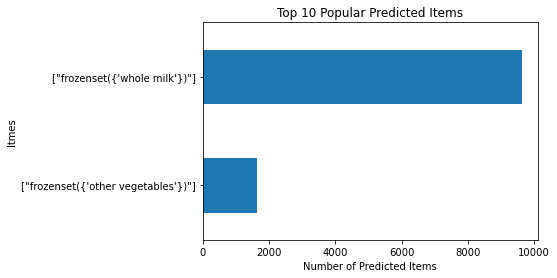

In [128]:
# Top 10 Popular Sold Items
df= result_df.groupby(["predicted_item"])["predicted_item"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Predicted Items')
plt.title('Top 10 Popular Predicted Items')

candy
white wine
domestic eggs
coffee
bottled water
long life bakery product
soda
frankfurter
pip fruit
tropical fruit
frozen dessert
tropical fruit
canned beer
other vegetables
pork
oil
specialty bar
rolls/buns
chocolate
frozen meals
beverages
pickled vegetables
rum
jam
sugar
brown bread
flower (seeds)
other vegetables
semi-finished bread
root vegetables
citrus fruit
dog food
napkins
sugar
curd
pastry
coffee
root vegetables
rolls/buns
whole milk
meat
male cosmetics
butter milk
sausage
hygiene articles
whole milk
bottled water
canned beer
pork
misc. beverages
whole milk
oil
chewing gum
cleaner
chocolate marshmallow
root vegetables
other vegetables
domestic eggs
detergent
chicken
mayonnaise
rolls/buns
margarine
long life bakery product
other vegetables
whole milk
grapes
baking powder
soda
coffee
coffee
house keeping products
rolls/buns
bottled water
other vegetables
rolls/buns
white bread
ham
whipped/sour cream
salty snack
pip fruit
pip fruit
pork
butter milk
turkey
fish
pork
brown brea

citrus fruit
bottled beer
bottled water
hygiene articles
bottled beer
curd cheese
other vegetables
cream cheese 
tropical fruit
cake bar
tropical fruit
frankfurter
frozen vegetables
meat
white wine
citrus fruit
salty snack
other vegetables
sugar
sausage
root vegetables
cat food
bottled water
hard cheese
frozen vegetables
yogurt
hard cheese
whole milk
cream cheese 
waffles
citrus fruit
whole milk
root vegetables
other vegetables
other vegetables
bottled water
white bread
white wine
meat
newspapers
dishes
pork
frozen dessert
canned beer
curd
root vegetables
salty snack
dog food
frankfurter
rolls/buns
bathroom cleaner
yogurt
margarine
napkins
tropical fruit
popcorn
condensed milk
coffee
pip fruit
other vegetables
cream cheese 
frankfurter
meat spreads
curd cheese
newspapers
flour
whole milk
whipped/sour cream
sliced cheese
pip fruit
whipped/sour cream
whole milk
pastry
other vegetables
whole milk
bottled water
uht-milk
specialty chocolate
bottled water
light bulbs
pastry
frozen fruits
sod

other vegetables
frankfurter
pickled vegetables
vinegar
cream cheese 
whipped/sour cream
tropical fruit
other vegetables
tropical fruit
soda
newspapers
sausage
pastry
salty snack
other vegetables
newspapers
brown bread
bottled beer
whole milk
bottled beer
zwieback
chocolate marshmallow
bottled water
rolls/buns
root vegetables
roll products 
misc. beverages
rolls/buns
sausage
domestic eggs
grapes
white bread
soda
whole milk
frankfurter
uht-milk
newspapers
yogurt
whole milk
domestic eggs
hard cheese
bottled water
specialty chocolate
brown bread
canned beer
chicken
soft cheese
canned beer
citrus fruit
bottled beer
white bread
soda
soda
citrus fruit
sauces
pork
hamburger meat
root vegetables
bottled water
misc. beverages
misc. beverages
salt
whole milk
hamburger meat
ice cream
domestic eggs
bottled beer
cream cheese 
coffee
butter milk
pip fruit
semi-finished bread
root vegetables
salty snack
whole milk
long life bakery product
cream cheese 
napkins
newspapers
soda
soda
whole milk
other ve

yogurt
citrus fruit
other vegetables
whole milk
butter
root vegetables
hamburger meat
frankfurter
hamburger meat
whole milk
newspapers
bottled beer
fish
rolls/buns
pip fruit
other vegetables
chicken
red/blush wine
grapes
whole milk
yogurt
specialty chocolate
frozen vegetables
sausage
yogurt
onions
yogurt
sweet spreads
soda
ice cream
pork
pastry
canned beer
yogurt
soda
onions
grapes
pastry
specialty chocolate
other vegetables
brown bread
yogurt
yogurt
whole milk
newspapers
root vegetables
shopping bags
pot plants
newspapers
soda
soda
yogurt
soda
pastry
chocolate
waffles
fruit/vegetable juice
other vegetables
chicken
packaged fruit/vegetables
whipped/sour cream
misc. beverages
fruit/vegetable juice
ice cream
salty snack
soda
frankfurter
shopping bags
tropical fruit
long life bakery product
pastry
white wine
tropical fruit
bottled water
newspapers
whole milk
sparkling wine
other vegetables
domestic eggs
domestic eggs
ice cream
other vegetables
yogurt
rolls/buns
butter
shopping bags
pork
w

soups
dessert
pastry
canned fish
soups
hamburger meat
frozen vegetables
butter
yogurt
dishes
ice cream
soda
bottled water
curd
ham
white wine
specialty cheese
oil
nuts/prunes
citrus fruit
bottled beer
curd
whole milk
whole milk
bottled water
tropical fruit
domestic eggs
white bread
oil
misc. beverages
chocolate marshmallow
curd
pip fruit
canned beer
pip fruit
brown bread
cream cheese 
yogurt
sausage
beef
brown bread
pip fruit
pip fruit
long life bakery product
frozen vegetables
rolls/buns
shopping bags
photo/film
herbs
berries
shopping bags
fruit/vegetable juice
ice cream
domestic eggs
whole milk
other vegetables
rolls/buns
butter milk
specialty bar
chicken
pastry
soda
specialty bar
whipped/sour cream
pork
whole milk
whole milk
uht-milk
yogurt
hygiene articles
newspapers
shopping bags
specialty chocolate
other vegetables
butter
oil
newspapers
long life bakery product
other vegetables
salty snack
frankfurter
frankfurter
whipped/sour cream
onions
zwieback
sliced cheese
bottled water
shop

hard cheese
coffee
butter
cream cheese 
grapes
finished products
processed cheese
chewing gum
chocolate
herbs
sugar
candles
yogurt
misc. beverages
root vegetables
whole milk
frozen potato products
flour
yogurt
yogurt
pork
pip fruit
rolls/buns
ham
root vegetables
other vegetables
other vegetables
frankfurter
coffee
frozen vegetables
rolls/buns
condensed milk
pastry
shopping bags
bottled beer
other vegetables
rolls/buns
bottled beer
baking powder
specialty chocolate
pastry
tropical fruit
bottled beer
brown bread
yogurt
butter
whole milk
candy
yogurt
soda
chicken
whipped/sour cream
abrasive cleaner
pork
cream cheese 
hamburger meat
canned beer
fruit/vegetable juice
whole milk
berries
other vegetables
zwieback
salty snack
pork
fruit/vegetable juice
yogurt
oil
artif. sweetener
canned beer
shopping bags
pip fruit
rolls/buns
newspapers
root vegetables
onions
bathroom cleaner
condensed milk
cream cheese 
whole milk
meat
grapes
pip fruit
root vegetables
tropical fruit
rum
chocolate marshmallow


pork
domestic eggs
beverages
beverages
candy
domestic eggs
citrus fruit
canned beer
dessert
onions
other vegetables
waffles
sausage
other vegetables
pastry
whole milk
fruit/vegetable juice
whole milk
long life bakery product
sausage
brown bread
fish
grapes
butter milk
root vegetables
other vegetables
domestic eggs
cat food
herbs
tropical fruit
seasonal products
rolls/buns
cookware
waffles
tropical fruit
whole milk
oil
tropical fruit
other vegetables
other vegetables
specialty chocolate
rolls/buns
domestic eggs
soda
whipped/sour cream
yogurt
chicken
brown bread
bottled beer
canned fruit
rolls/buns
snack products
bottled water
rolls/buns
ham
domestic eggs
detergent
rolls/buns
other vegetables
berries
bottled beer
brown bread
domestic eggs
onions
tropical fruit
berries
soda
salty snack
pastry
canned fruit
soda
processed cheese
whole milk
whole milk
curd
baking powder
pork
newspapers
frozen meals
domestic eggs
rolls/buns
sausage
onions
canned beer
male cosmetics
root vegetables
chocolate
s

specialty bar
canned beer
margarine
hamburger meat
yogurt
rolls/buns
beverages
soda
yogurt
pork
canned beer
sausage
bottled water
cream cheese 
ham
fruit/vegetable juice
house keeping products
bottled water
soda
shopping bags
pastry
beverages
other vegetables
cookware
soda
soda
brown bread
long life bakery product
fruit/vegetable juice
tropical fruit
shopping bags
specialty chocolate
other vegetables
packaged fruit/vegetables
other vegetables
bottled beer
processed cheese
roll products 
whole milk
other vegetables
white bread
other vegetables
white wine
bottled beer
soda
white wine
newspapers
chewing gum
beverages
yogurt
liquor
pastry
sugar
sausage
onions
whole milk
oil
other vegetables
soda
sugar
bottled water
pip fruit
syrup
other vegetables
fruit/vegetable juice
soda
margarine
pasta
whole milk
condensed milk
pip fruit
soda
sliced cheese
tropical fruit
root vegetables
citrus fruit
whole milk
frankfurter
margarine
citrus fruit
butter
chicken
fruit/vegetable juice
sugar
frozen vegetabl

soda
whole milk
mustard
berries
chicken
butter
dessert
pastry
beverages
soda
tropical fruit
whole milk
pork
soda
soda
root vegetables
coffee
soda
canned fish
curd
rolls/buns
sausage
rolls/buns
butter
hamburger meat
berries
margarine
whole milk
cat food
bottled beer
frozen meals
frozen meals
domestic eggs
cream cheese 
pot plants
liquor
chewing gum
butter
bottled beer
tropical fruit
cling film/bags
cream cheese 
butter
bottled beer
pork
soups
whole milk
sugar
salty snack
beef
napkins
whole milk
bottled water
pork
frozen dessert
seasonal products
citrus fruit
soda
citrus fruit
waffles
pip fruit
soft cheese
pork
chicken
soda
liver loaf
tropical fruit
chicken
yogurt
sliced cheese
other vegetables
pasta
sausage
white bread
citrus fruit
ham
whole milk
whole milk
berries
other vegetables
margarine
whole milk
baking powder
pork
pastry
margarine
canned vegetables
whole milk
fruit/vegetable juice
whole milk
shopping bags
sugar
domestic eggs
other vegetables
whole milk
margarine
coffee
tidbits
tr

butter
whole milk
whole milk
frozen dessert
chewing gum
herbs
rolls/buns
yogurt
rolls/buns
butter
napkins
root vegetables
specialty chocolate
napkins
coffee
pip fruit
cream cheese 
soda
zwieback
waffles
other vegetables
ham
pastry
other vegetables
rolls/buns
shopping bags
rolls/buns
citrus fruit
pip fruit
whole milk
pip fruit
rolls/buns
fruit/vegetable juice
whole milk
pasta
tropical fruit
tropical fruit
mustard
soft cheese
hygiene articles
sausage
root vegetables
pasta
frankfurter
bottled water
other vegetables
domestic eggs
whole milk
whipped/sour cream
pastry
candy
pastry
white bread
bottled water
candy
pastry
butter
yogurt
butter
long life bakery product
dishes
rum
pork
canned beer
tropical fruit
specialty chocolate
candles
waffles
uht-milk
curd
pork
bottled water
soda
specialty bar
frankfurter
dish cleaner
pastry
other vegetables
newspapers
rolls/buns
spread cheese
cream cheese 
white wine
sausage
other vegetables
tropical fruit
whole milk
pork
rolls/buns
whole milk
dessert
other 

candy
fruit/vegetable juice
other vegetables
prosecco
brown bread
fruit/vegetable juice
chocolate
pickled vegetables
zwieback
rice
canned beer
other vegetables
pot plants
other vegetables
curd
oil
photo/film
frozen meals
chocolate
napkins
dish cleaner
misc. beverages
pork
hygiene articles
pastry
whole milk
pip fruit
shopping bags
bottled water
white bread
tropical fruit
whole milk
other vegetables
white bread
shopping bags
butter
other vegetables
curd
frozen vegetables
other vegetables
soda
rice
whole milk
frozen dessert
soda
long life bakery product
soda
rolls/buns
root vegetables
beef
fruit/vegetable juice
white bread
other vegetables
other vegetables
whole milk
rum
bottled water
pork
cake bar
pork
margarine
canned beer
domestic eggs
dental care
butter milk
rolls/buns
uht-milk
pip fruit
soft cheese
domestic eggs
shopping bags
other vegetables
pastry
pot plants
ham
pork
dessert
canned beer
dental care
soda
pastry
sausage
pork
long life bakery product
whole milk
tropical fruit
brown br

citrus fruit
frozen vegetables
whipped/sour cream
soda
shopping bags
spices
decalcifier
onions
red/blush wine
other vegetables
softener
soda
coffee
soda
pork
pastry
berries
beef
white bread
sausage
whole milk
other vegetables
onions
chocolate marshmallow
sausage
curd
oil
newspapers
herbs
rolls/buns
frozen vegetables
root vegetables
pickled vegetables
shopping bags
baking powder
salty snack
pip fruit
root vegetables
canned beer
whole milk
soft cheese
onions
root vegetables
hygiene articles
cream cheese 
other vegetables
pot plants
specialty bar
beef
pork
butter milk
red/blush wine
shopping bags
citrus fruit
white wine
bottled beer
butter
other vegetables
frankfurter
salty snack
whole milk
newspapers
popcorn
white wine
waffles
semi-finished bread
long life bakery product
butter
pork
sausage
yogurt
soda
chicken
root vegetables
artif. sweetener
pastry
oil
berries
grapes
berries
newspapers
whole milk
tropical fruit
soda
newspapers
pickled vegetables
cling film/bags
hamburger meat
seasonal p

whole milk
whipped/sour cream
other vegetables
rolls/buns
pastry
frankfurter
frankfurter
soda
frankfurter
salty snack
yogurt
shopping bags
soda
canned fish
dishes
root vegetables
pastry
newspapers
whole milk
rolls/buns
citrus fruit
shopping bags
honey
waffles
specialty chocolate
herbs
root vegetables
white bread
soda
rolls/buns
whole milk
white wine
rolls/buns
other vegetables
soda
root vegetables
whole milk
cream cheese 
root vegetables
rolls/buns
whole milk
root vegetables
coffee
pip fruit
chicken
frankfurter
detergent
curd
frozen dessert
other vegetables
meat spreads
domestic eggs
butter
bottled beer
brown bread
pastry
citrus fruit
pastry
sausage
flour
canned beer
whole milk
root vegetables
whole milk
napkins
frozen vegetables
white bread
dessert
pork
rolls/buns
root vegetables
domestic eggs
mayonnaise
rolls/buns
dishes
root vegetables
specialty bar
chicken
other vegetables
candy
other vegetables
domestic eggs
soda
coffee
fruit/vegetable juice
misc. beverages
berries
tropical fruit


bottled water
pasta
long life bakery product
cream cheese 
newspapers
tropical fruit
chocolate
other vegetables
processed cheese
domestic eggs
curd cheese
mayonnaise
sugar
butter
potato products
shopping bags
whole milk
brown bread
herbs
whole milk
other vegetables
rolls/buns
chocolate
beef
tropical fruit
oil
sausage
specialty cheese
fruit/vegetable juice
yogurt
canned fish
rolls/buns
butter
yogurt
berries
margarine
detergent
house keeping products
canned beer
yogurt
curd
coffee
soda
cat food
onions
tropical fruit
soda
hamburger meat
soda
chewing gum
soda
white bread
margarine
yogurt
butter milk
whole milk
rolls/buns
red/blush wine
frozen dessert
newspapers
butter milk
newspapers
pastry
chocolate
brown bread
pork
canned beer
spread cheese
cleaner
pip fruit
butter
soda
shopping bags
coffee
specialty chocolate
soda
curd
cream cheese 
curd
butter
coffee
tropical fruit
sausage
soda
long life bakery product
whole milk
bottled water
domestic eggs
instant coffee
pork
newspapers
hard cheese
yo

uht-milk
root vegetables
yogurt
tropical fruit
rolls/buns
rolls/buns
beef
white bread
white wine
canned beer
candy
whole milk
napkins
hamburger meat
rolls/buns
whole milk
chewing gum
sausage
newspapers
whipped/sour cream
rolls/buns
citrus fruit
hamburger meat
hygiene articles
soda
margarine
whole milk
yogurt
photo/film
napkins
rolls/buns
canned beer
sugar
shopping bags
uht-milk
other vegetables
yogurt
pip fruit
pip fruit
ketchup
whole milk
root vegetables
brown bread
domestic eggs
whipped/sour cream
dog food
seasonal products
pork
dishes
softener
newspapers
bottled water
flour
root vegetables
soda
sausage
margarine
frozen meals
flower (seeds)
canned fish
soda
butter
root vegetables
liqueur
fruit/vegetable juice
pip fruit
butter
sausage
yogurt
salt
chocolate
rolls/buns
hard cheese
candy
dishes
fruit/vegetable juice
herbs
fruit/vegetable juice
margarine
soda
margarine
soda
liquor (appetizer)
whole milk
pip fruit
hard cheese
canned beer
uht-milk
canned beer
processed cheese
frozen meals
c

waffles
other vegetables
frozen vegetables
baking powder
other vegetables
whipped/sour cream
newspapers
bottled beer
meat
whisky
other vegetables
whole milk
butter milk
yogurt
other vegetables
bottled beer
yogurt
citrus fruit
whipped/sour cream
bottled water
pastry
butter
yogurt
whole milk
whole milk
flour
chicken
pastry
candy
brown bread
frankfurter
whipped/sour cream
pot plants
frozen meals
white wine
oil
bottled beer
hard cheese
rolls/buns
white bread
dishes
tropical fruit
frozen vegetables
pastry
other vegetables
sliced cheese
yogurt
whole milk
citrus fruit
other vegetables
white bread
soda
chicken
whole milk
bottled beer
sparkling wine
whole milk
red/blush wine
sausage
shopping bags
dessert
specialty bar
beef
canned beer
canned beer
frozen fish
candles
canned vegetables
pastry
soda
bottled beer
rolls/buns
coffee
whole milk
semi-finished bread
beef
yogurt
root vegetables
ketchup
canned beer
root vegetables
hard cheese
frankfurter
whole milk
sausage
other vegetables
soda
whole milk


Text(0.5, 1.0, 'Top 10 Popular Predicted Items')

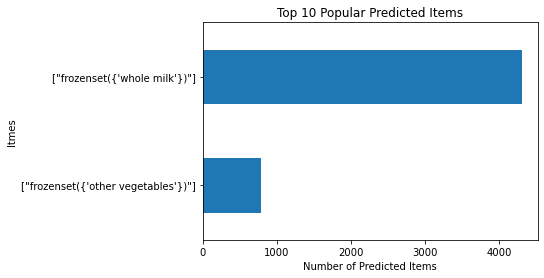

In [129]:
#test_data recommendation, Top 5 for each item
new_test_data = test_data.reset_index(drop=True)
result=pd.DataFrame(columns=["itemDescription","predicted_item","Confidence"])
for i in range(len(new_test_data)):
    tmp=new_test_data.loc[i]
    item=tmp["itemDescription"]
    print(item)
    frozen_set = str(frozenset([item]))
    confidence,rec= rule_recommandation(rules,frozen_set,1)
    rec=str(rec)
    res={"itemDescription":item,"predicted_item":rec,"Confidence":confidence}
    result=result.append(res,ignore_index=True)
result_df = result[result['Confidence'] != 0]
result_df
# Top 10 Popular Sold Items
df= result_df.groupby(["predicted_item"])["predicted_item"].count().sort_values(axis= 0,ascending =False)
df = df[:10,].sort_values(ascending = True)
df.plot(kind = "barh")
plt.ylabel('Itmes')
plt.xlabel('Number of Predicted Items')
plt.title('Top 10 Popular Predicted Items')

In [130]:
result_df

,itemDescription,predicted_item,Confidence
4,bottled water,"[""frozenset({'whole milk'})""]",[0.4297253634894991]
6,soda,"[""frozenset({'whole milk'})""]",[0.3846153846153846]
8,pip fruit,"[""frozenset({'whole milk'})""]",[0.4184549356223175]
9,tropical fruit,"[""frozenset({'whole milk'})""]",[0.3837579617834395]
11,tropical fruit,"[""frozenset({'whole milk'})""]",[0.3837579617834395]
...,...,...,...
11699,tropical fruit,"[""frozenset({'whole milk'})""]",[0.3837579617834395]
11701,other vegetables,"[""frozenset({'whole milk'})""]",[0.3943789664551224]
11702,tropical fruit,"[""frozenset({'whole milk'})""]",[0.3837579617834395]
11703,other vegetables,"[""frozenset({'whole milk'})""]",[0.3943789664551224]
